Import Necessary Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

from pycaret.classification import *
import plotly.express as px
import seaborn as sns

In [94]:
# !pip install -U scikit-learn

In [95]:
# Read Dataset
df=pd.read_csv("addresses.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18057 entries, 0 to 18056
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        18057 non-null  int64  
 1   address                                           18057 non-null  object 
 2   Avg min between sent tnx                          18057 non-null  float64
 3   Avg min between received tnx                      18057 non-null  float64
 4   Time Diff between first and_last (Mins)           18057 non-null  int64  
 5   Sent_tnx                                          18057 non-null  int64  
 6   Received_tnx                                      18057 non-null  int64  
 7   NumberofCreated_Contracts                         18057 non-null  int64  
 8   UniqueReceivedFrom_Addresses                      18057 non-null  int64  
 9   UniqueSentTo_Addr

In [96]:
# drop first two columns (Index, Adress)
df = df.iloc[:,2:]

In [97]:
df.head(5)

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and_last (Mins),Sent_tnx,Received_tnx,NumberofCreated_Contracts,UniqueReceivedFrom_Addresses,UniqueSentTo_Addresses20,MinValueReceived,MaxValueReceived,...,ERC20MaxVal_Rec,ERC20AvgVal_Rec,ERC20MinVal_Sent,ERC20MaxVal_Sent,ERC20AvgVal_Sent,ERC20UniqSentTokenName,ERC20UniqRecTokenName,ERC20MostSentTokenType,ERC20MostRecTokenType,flag
0,0.0,4872943.50,9745887,0,3,0,3,0,3.440000e+16,1.050000e+18,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,True
1,0.0,136003.04,3400076,0,26,0,24,0,1.358340e+15,2.697967e+19,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,True
2,0.0,0.00,0,0,0,0,0,0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,True
3,0.0,228526.00,228526,0,2,0,2,0,4.990000e+17,5.000000e+17,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,True
4,0.0,198830.50,397661,0,3,0,3,0,1.000000e+18,2.199140e+18,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,True


In [98]:
# Installing pycaret *
# !pip install --upgrade pip

In [99]:
# !pip install packaging

In [100]:
# !pip install --pre pycaret -q

In [101]:
# setup(df,target="flag",session_id=85)

In [102]:
# compare_models()

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18057 entries, 0 to 18056
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Avg min between sent tnx                          18057 non-null  float64
 1   Avg min between received tnx                      18057 non-null  float64
 2   Time Diff between first and_last (Mins)           18057 non-null  int64  
 3   Sent_tnx                                          18057 non-null  int64  
 4   Received_tnx                                      18057 non-null  int64  
 5   NumberofCreated_Contracts                         18057 non-null  int64  
 6   UniqueReceivedFrom_Addresses                      18057 non-null  int64  
 7   UniqueSentTo_Addresses20                          18057 non-null  int64  
 8   MinValueReceived                                  18057 non-null  float64
 9   MaxValueReceived 

In [104]:
for col in df:print(f'{col} : {len(df[col].unique())}')

Avg min between sent tnx : 1735
Avg min between received tnx : 12426
Time Diff between first and_last (Mins) : 12701
Sent_tnx : 502
Received_tnx : 2792
NumberofCreated_Contracts : 104
UniqueReceivedFrom_Addresses : 2067
UniqueSentTo_Addresses20 : 305
MinValueReceived : 1446
MaxValueReceived : 3355
AvgValueReceived5Average : 2667
MinValSent : 1224
MaxValSent : 1322
AvgValSent : 1618
MinValueSentToContract : 80
MaxValueSentToContract : 88
AvgValueSentToContract : 78
TotalTransactions(IncludingTnxtoCreate_Contract) : 2276
TotalEtherSent : 1854
TotalEtherReceived : 3085
TotalEtherSent_Contracts : 81
TotalEtherBalance : 2253
TotalERC20Tnxs: : 516
ERC20TotalEther_Received : 4516
ERC20TotalEther_Sent : 2338
ERC20TotalEtherSentContract : 2856
ERC20UniqSent_Addr: : 353
ERC20UniqRec_Addr: : 288
ERC20UniqRecContractAddr: : 148
ERC20AvgTimeBetweenSent_Tnx : 2095
ERC20AvgTimeBetweenRec_Tnx : 4466
ERC20AvgTimeBetweenContract_Tnx : 2903
ERC20MinVal_Rec : 1572
ERC20MaxVal_Rec : 2478
ERC20AvgVal_Rec : 

In [105]:
df.select_dtypes(include=['float','int']).describe()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and_last (Mins),Sent_tnx,Received_tnx,NumberofCreated_Contracts,UniqueReceivedFrom_Addresses,UniqueSentTo_Addresses20,MinValueReceived,MaxValueReceived,...,ERC20AvgTimeBetweenRec_Tnx,ERC20AvgTimeBetweenContract_Tnx,ERC20MinVal_Rec,ERC20MaxVal_Rec,ERC20AvgVal_Rec,ERC20MinVal_Sent,ERC20MaxVal_Sent,ERC20AvgVal_Sent,ERC20MostSentTokenType,ERC20MostRecTokenType
count,1.805700e+04,1.805700e+04,1.805700e+04,18057.000000,18057.000000,18057.000000,18057.000000,18057.000000,1.805700e+04,1.805700e+04,...,1.805700e+04,1.805700e+04,1.805700e+04,1.805700e+04,1.805700e+04,1.805700e+04,1.805700e+04,1.805700e+04,18057.000000,18057.000000
mean,2.379833e+05,1.016247e+06,2.291759e+07,75.647561,1061.624688,2.306419,294.830814,18.330121,1.270018e+18,5.874565e+20,...,3.701658e+06,3.293690e+06,1.041508e+73,9.028584e+73,3.271640e+72,6.667022e+25,1.264447e+73,9.248491e+70,0.602758,2.700781
std,2.864599e+06,5.484753e+06,3.855864e+07,735.539400,2686.565354,68.394606,978.687796,260.008383,9.152431e+19,1.424000e+22,...,1.608216e+07,1.550909e+07,9.895450e+74,3.070059e+75,2.337642e+74,7.467916e+27,1.201547e+75,1.043670e+73,3.868173,12.044134
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,9.730000e+02,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000e+00,1.387201e+04,2.153110e+06,0.000000,7.000000,1.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,0.000000e+00,2.151028e+05,2.694198e+07,0.000000,118.000000,1.000000,26.000000,0.000000,0.000000e+00,9.950000e+17,...,8.892000e+03,0.000000e+00,2.303900e+04,1.000000e+19,1.000000e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
max,1.014785e+08,1.508566e+08,2.345687e+08,10000.000000,10000.000000,6410.000000,9992.000000,7853.000000,1.000000e+22,7.895250e+23,...,1.525041e+08,1.517945e+08,9.402811e+76,1.157921e+77,2.890000e+76,1.000000e+30,1.157921e+77,1.370000e+75,164.000000,512.000000


In [106]:
df['flag'].value_counts()

False    13223
True      4834
Name: flag, dtype: int64

In [107]:
fig = px.pie(df, values=df['flag'].value_counts().values, names=df['flag'].value_counts() ,
             title='Target distribution of being Fraud or not', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [108]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,ERC20UniqSentTokenName,ERC20UniqRecTokenName
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18052,0,SWTCoin
18053,0,NaN
18054,blockwell.ai KYC Casper Token,Teleport
18055,0,0


In [109]:
# Drop the two categorical features
df.drop(df[categories], axis=1, inplace=True)

In [110]:
# Replace missings of numerical variables with median
# df.fillna(df.median(), inplace=True)

In [111]:
df.isnull().sum()

Avg min between sent tnx                            0
Avg min between received tnx                        0
Time Diff between first and_last (Mins)             0
Sent_tnx                                            0
Received_tnx                                        0
NumberofCreated_Contracts                           0
UniqueReceivedFrom_Addresses                        0
UniqueSentTo_Addresses20                            0
MinValueReceived                                    0
MaxValueReceived                                    0
AvgValueReceived5Average                            0
MinValSent                                          0
MaxValSent                                          0
AvgValSent                                          0
MinValueSentToContract                              0
MaxValueSentToContract                              0
AvgValueSentToContract                              0
TotalTransactions(IncludingTnxtoCreate_Contract)    0
TotalEtherSent              

Data Cleaning - Drop Features with Variance=0

In [112]:
# Filtering the features with 0 variance
no_var = df.var() == 0
df.var()[no_var]

Series([], dtype: float64)

In [113]:
# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())

Avg min between sent tnx                             8.205928e+12
Avg min between received tnx                         3.008251e+13
Time Diff between first and_last (Mins)              1.486769e+15
Sent_tnx                                             5.410182e+05
Received_tnx                                         7.217633e+06
NumberofCreated_Contracts                            4.677822e+03
UniqueReceivedFrom_Addresses                         9.578298e+05
UniqueSentTo_Addresses20                             6.760436e+04
MinValueReceived                                     8.376700e+39
MaxValueReceived                                     2.027777e+44
AvgValueReceived5Average                             1.116127e+40
MinValSent                                           3.501971e+43
MaxValSent                                           1.287141e+44
AvgValSent                                           3.510099e+43
MinValueSentToContract                               7.844366e+45
MaxValueSe

In [114]:
df.shape

(18057, 41)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18057 entries, 0 to 18056
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Avg min between sent tnx                          18057 non-null  float64
 1   Avg min between received tnx                      18057 non-null  float64
 2   Time Diff between first and_last (Mins)           18057 non-null  int64  
 3   Sent_tnx                                          18057 non-null  int64  
 4   Received_tnx                                      18057 non-null  int64  
 5   NumberofCreated_Contracts                         18057 non-null  int64  
 6   UniqueReceivedFrom_Addresses                      18057 non-null  int64  
 7   UniqueSentTo_Addresses20                          18057 non-null  int64  
 8   MinValueReceived                                  18057 non-null  float64
 9   MaxValueReceived 

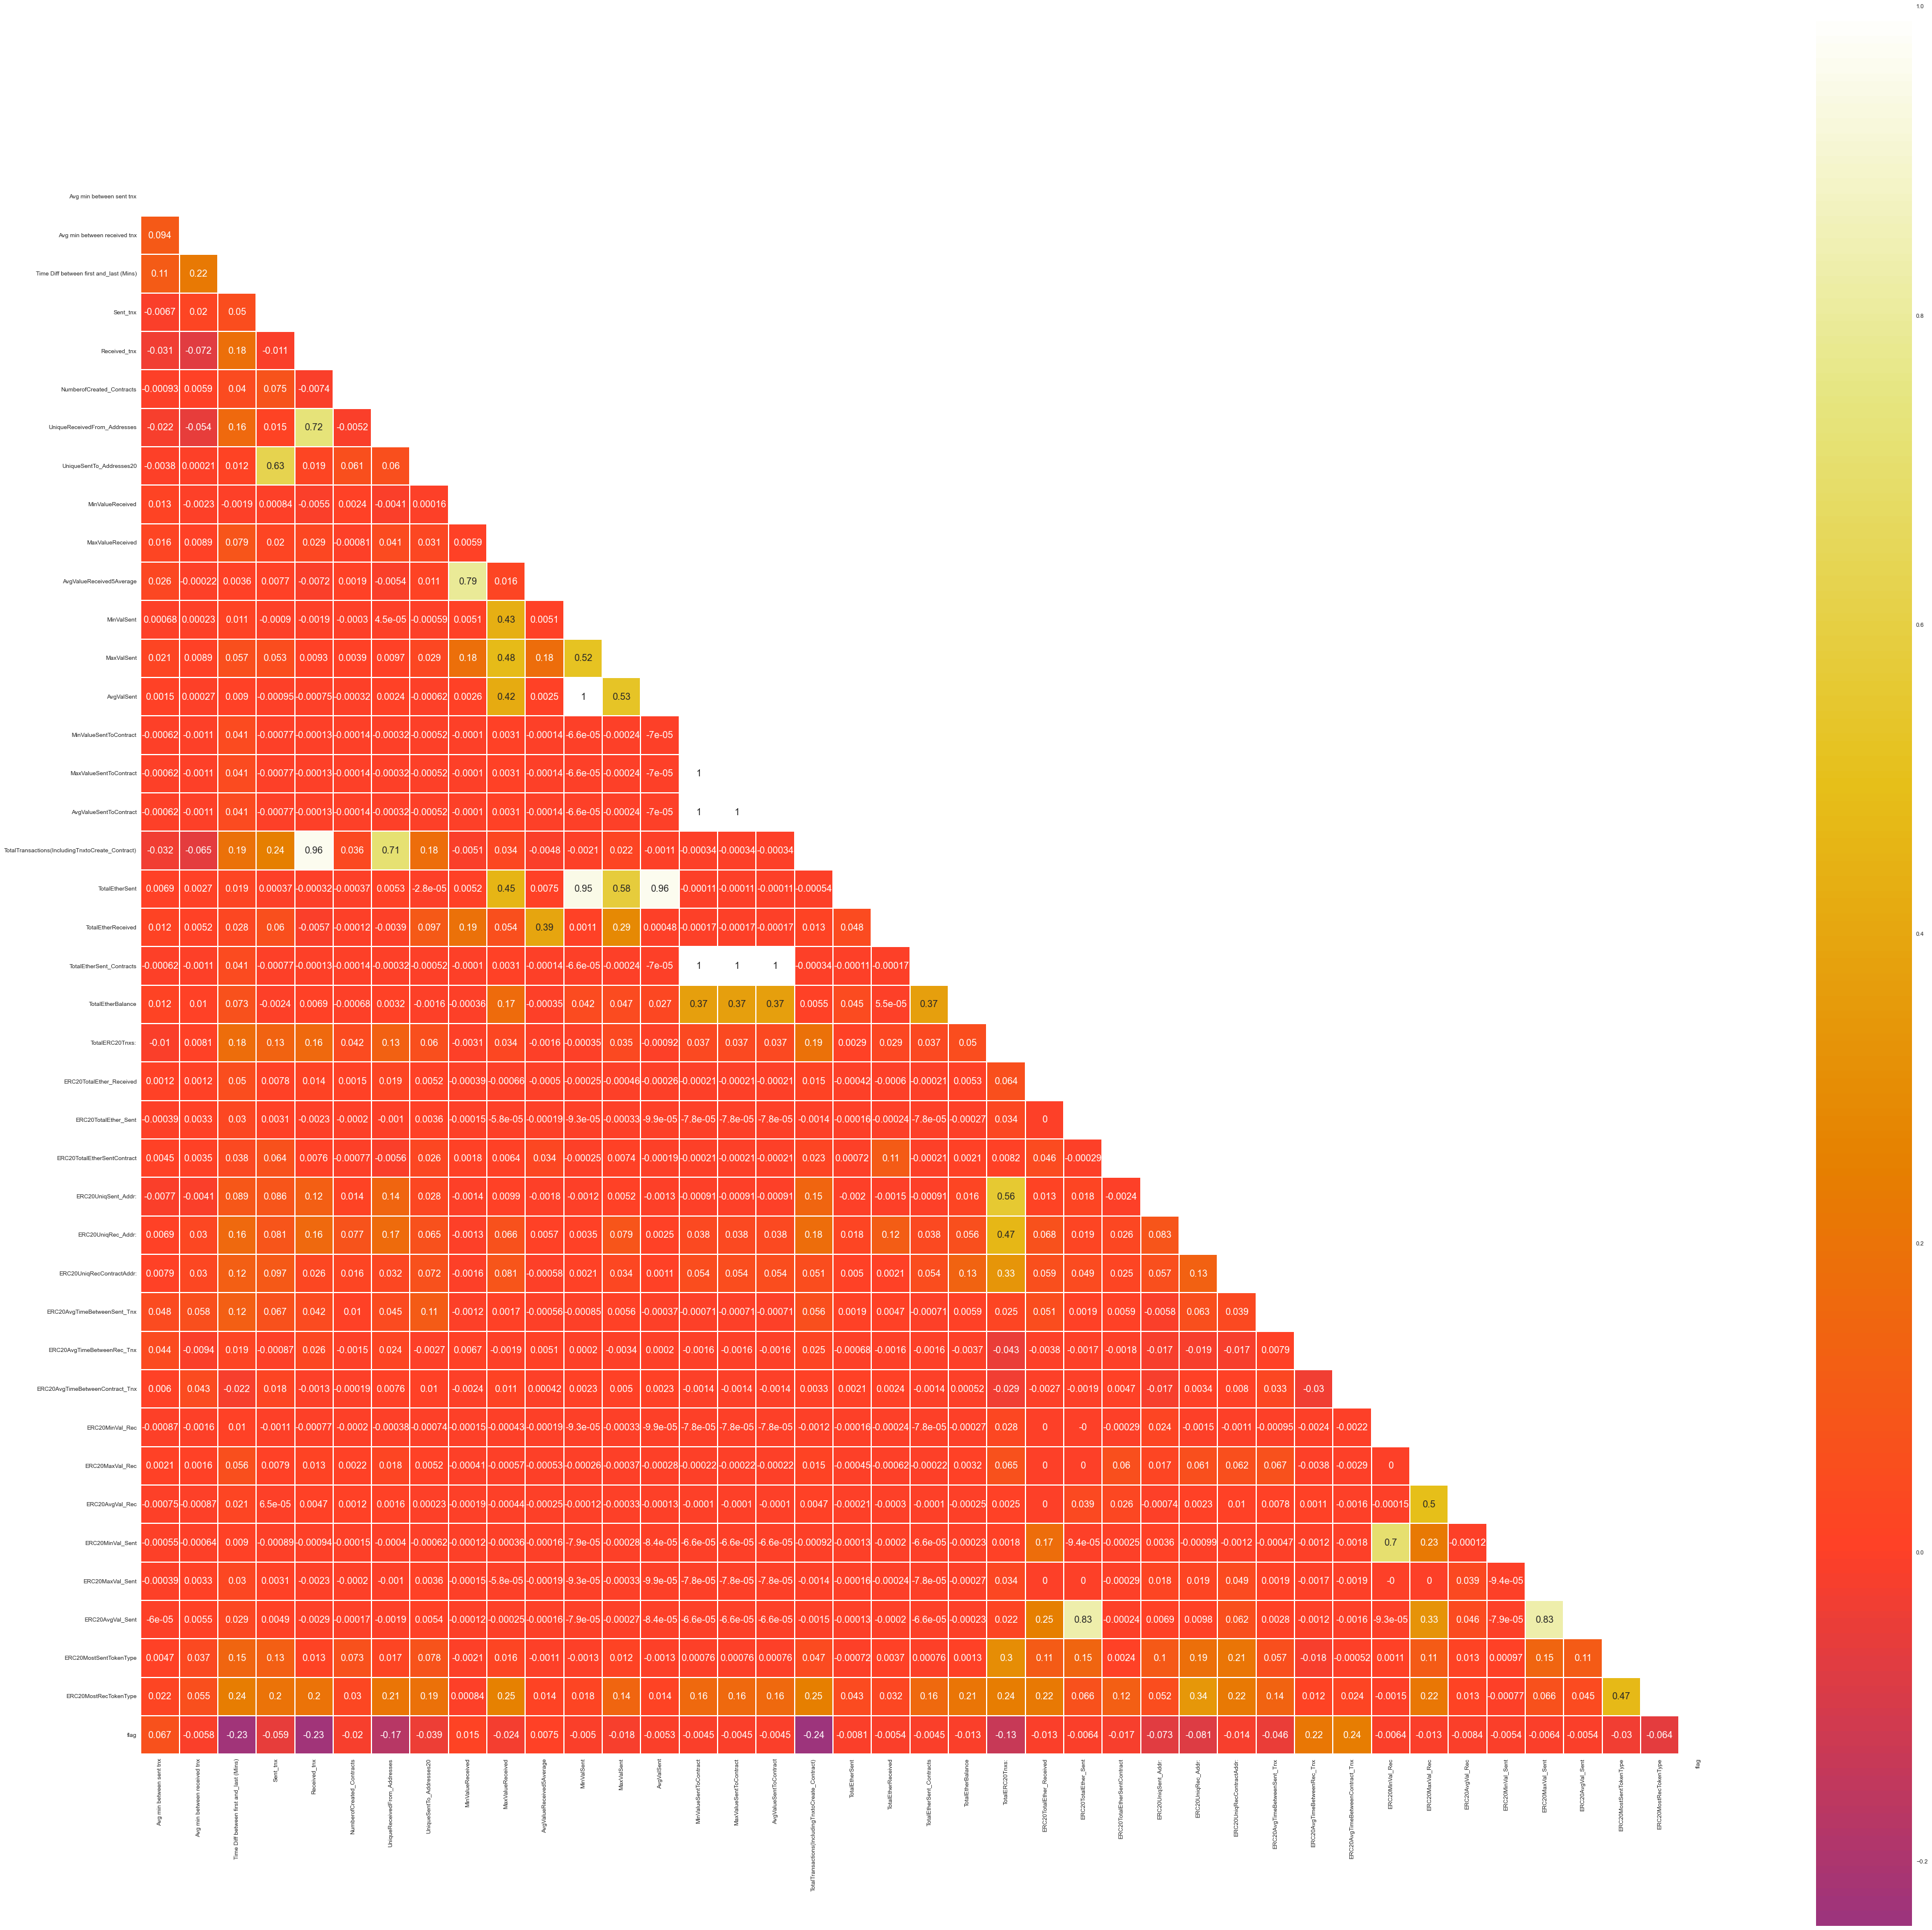

In [116]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60,60))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 16})

In [117]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
# df.drop(df.columns[to_drop], axis=1, inplace=True)

In [118]:
print(len(to_drop))
print(to_drop)

7
['AvgValSent', 'MaxValueSentToContract', 'AvgValueSentToContract', 'TotalTransactions(IncludingTnxtoCreate_Contract)', 'TotalEtherSent', 'TotalEtherSent_Contracts', 'ERC20AvgVal_Sent']


In [119]:
for i in to_drop:
    df.drop([i], axis=1, inplace=True)

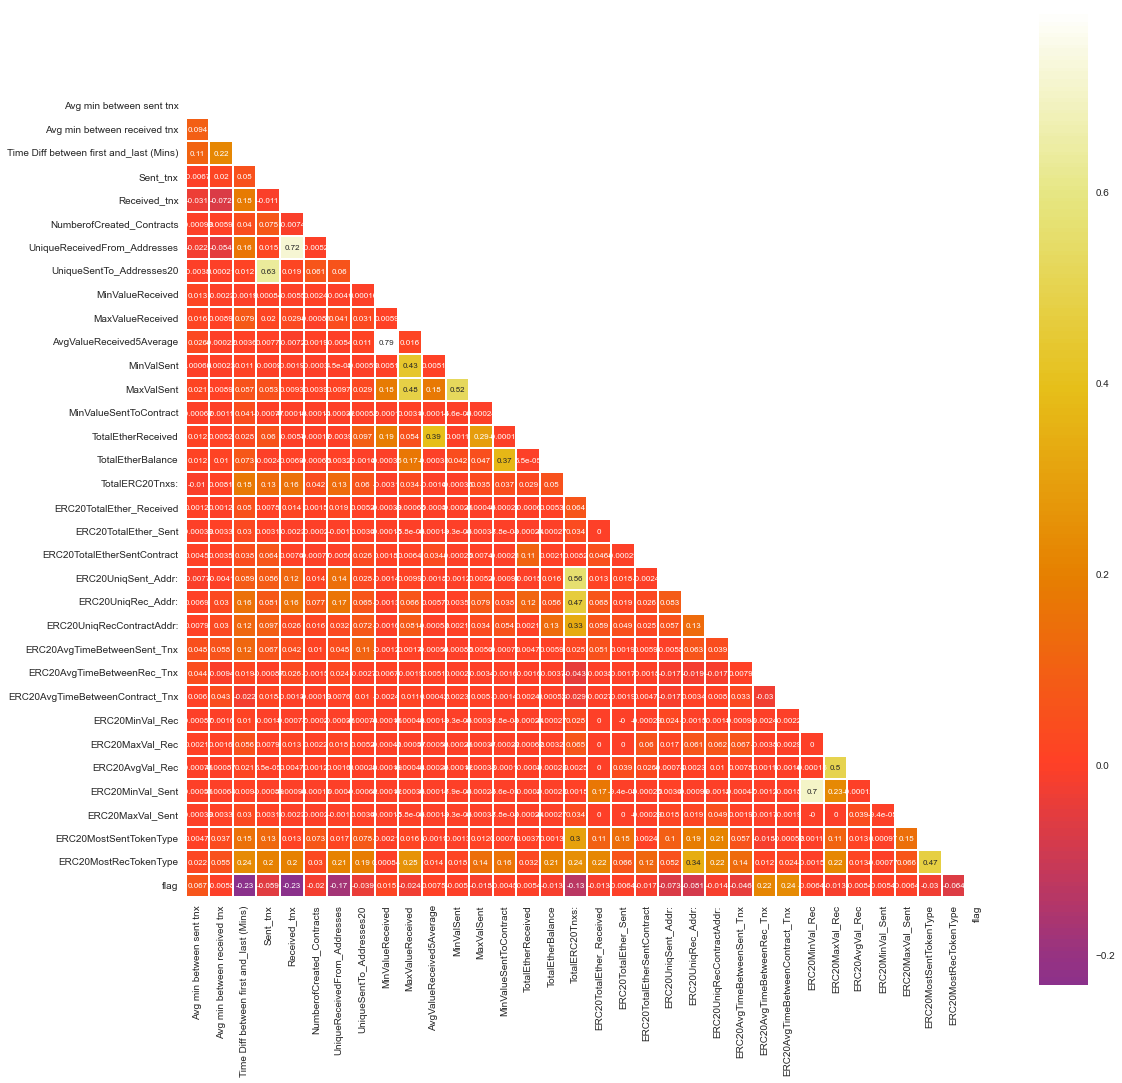

In [120]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 8})

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18057 entries, 0 to 18056
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Avg min between sent tnx                 18057 non-null  float64
 1   Avg min between received tnx             18057 non-null  float64
 2   Time Diff between first and_last (Mins)  18057 non-null  int64  
 3   Sent_tnx                                 18057 non-null  int64  
 4   Received_tnx                             18057 non-null  int64  
 5   NumberofCreated_Contracts                18057 non-null  int64  
 6   UniqueReceivedFrom_Addresses             18057 non-null  int64  
 7   UniqueSentTo_Addresses20                 18057 non-null  int64  
 8   MinValueReceived                         18057 non-null  float64
 9   MaxValueReceived                         18057 non-null  float64
 10  AvgValueReceived5Average                 18057

In [122]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column flag has the following distribution: 
False    13223
True      4834
Name: flag, dtype: int64


Data Preprocessing

In [123]:
X = df.iloc[:, :32]
y = df.iloc[:, 33:]
print(X.shape, y.shape)

(18057, 32) (18057, 1)


In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18057 entries, 0 to 18056
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Avg min between sent tnx                 18057 non-null  float64
 1   Avg min between received tnx             18057 non-null  float64
 2   Time Diff between first and_last (Mins)  18057 non-null  int64  
 3   Sent_tnx                                 18057 non-null  int64  
 4   Received_tnx                             18057 non-null  int64  
 5   NumberofCreated_Contracts                18057 non-null  int64  
 6   UniqueReceivedFrom_Addresses             18057 non-null  int64  
 7   UniqueSentTo_Addresses20                 18057 non-null  int64  
 8   MinValueReceived                         18057 non-null  float64
 9   MaxValueReceived                         18057 non-null  float64
 10  AvgValueReceived5Average                 18057

In [125]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18057 entries, 0 to 18056
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   flag    18057 non-null  bool 
dtypes: bool(1)
memory usage: 17.8 KB


In [126]:
y.value_counts()

flag 
False    13223
True      4834
dtype: int64

In [127]:
# y.head(10)
# cnt=0
# for i in y['flag']:
#     if i==True:
#         cnt+=1

# print(cnt)


In [128]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14445, 32) (14445, 1)
(3612, 32) (3612, 1)


In [129]:
X_train

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and_last (Mins),Sent_tnx,Received_tnx,NumberofCreated_Contracts,UniqueReceivedFrom_Addresses,UniqueSentTo_Addresses20,MinValueReceived,MaxValueReceived,...,ERC20UniqRecContractAddr:,ERC20AvgTimeBetweenSent_Tnx,ERC20AvgTimeBetweenRec_Tnx,ERC20AvgTimeBetweenContract_Tnx,ERC20MinVal_Rec,ERC20MaxVal_Rec,ERC20AvgVal_Rec,ERC20MinVal_Sent,ERC20MaxVal_Sent,ERC20MostSentTokenType
17031,0.0000,6.521796e+04,10130014,0,156,1,1,0,0.000000e+00,0.000000e+00,...,0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
14513,0.0000,5.504879e+03,635456,0,108,1,17,0,0.000000e+00,0.000000e+00,...,0,8412.391304,1.476835e+04,0.000000,2.000000e+18,1.200000e+19,1.020000e+19,3.928568e+14,1.200000e+19,1
1179,0.0000,0.000000e+00,0,0,0,0,0,0,0.000000e+00,0.000000e+00,...,0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
3716,205125.7941,3.940331e+06,6974543,35,2,0,2,2,6.000000e+16,1.000000e+17,...,0,93463.500000,1.150762e+05,0.000000,1.000000e+09,5.000000e+09,2.000000e+09,0.000000e+00,5.000000e+09,1
12532,0.0000,9.696791e+04,3738914,0,34,1,2,0,0.000000e+00,0.000000e+00,...,0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,0.0000,1.148859e+05,11834572,0,104,1,1,0,0.000000e+00,0.000000e+00,...,0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
7763,0.0000,1.119984e+04,100899652,0,9007,1,2392,0,0.000000e+00,0.000000e+00,...,0,0.000000,6.999458e+06,0.000000,5.000000e+19,1.495620e+23,1.500000e+23,0.000000e+00,0.000000e+00,0
15377,0.0000,2.118657e+06,33910296,0,17,1,5,0,0.000000e+00,0.000000e+00,...,0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
17730,0.0000,1.722146e+05,87650732,0,509,1,234,0,0.000000e+00,0.000000e+00,...,14,14708.380000,5.420099e+03,1028.687186,0.000000e+00,2.539393e+23,9.920000e+21,7.213101e+18,3.595186e+22,2


In [130]:
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)

Balanceing The Dataset Using SMOTE()

In [131]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {sc_train.shape, y_train.shape}')

Shape of the training before SMOTE: ((14445, 32), (14445, 1))


In [132]:
x_tr_resample, y_tr_resample = oversample.fit_resample(sc_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training after SMOTE: ((21192, 32), (21192, 1))


In [133]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0
print(type(y_train))

for i in y_train['flag']:
    if i == True:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample['flag']:
    if j == True:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')

<class 'pandas.core.frame.DataFrame'>
BEFORE OVERSAMPLING 
 	Non-frauds: 3849 
 	Fauds: 10596
AFTER OVERSAMPLING 
 	Non-frauds: 10596 
 	Fauds: 10597


Logistic Regression Classifier

In [134]:
LR = LogisticRegression(penalty='l2', intercept_scaling=100 , dual=False, random_state=42, multi_class='ovr', solver='lbfgs', max_iter=300,n_jobs=5)
LR.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

preds = LR.predict(sc_test)

In [135]:
print(y_test.shape)
y_test.value_counts()

(3612, 1)


flag 
False    2627
True      985
dtype: int64

In [136]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

       False       0.98      0.94      0.96      2627
        True       0.86      0.95      0.90       985

    accuracy                           0.94      3612
   macro avg       0.92      0.94      0.93      3612
weighted avg       0.95      0.94      0.94      3612

[[2476  151]
 [  54  931]]


Random Forest

In [137]:
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)
preds_RF = RF.predict(sc_test)

print(classification_report(y_test, preds_RF))
print(confusion_matrix(y_test, preds_RF))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      2627
        True       0.93      0.96      0.94       985

    accuracy                           0.97      3612
   macro avg       0.96      0.97      0.96      3612
weighted avg       0.97      0.97      0.97      3612

[[2553   74]
 [  37  948]]


XGB Classifier

In [138]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(sc_test)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))

              precision    recall  f1-score   support

       False       0.98      0.97      0.98      2627
        True       0.93      0.96      0.94       985

    accuracy                           0.97      3612
   macro avg       0.96      0.97      0.96      3612
weighted avg       0.97      0.97      0.97      3612

[[2554   73]
 [  40  945]]
